In [19]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Vibhu\Downloads\original.csv")

In [20]:
df.columns

Index(['Product_ID', 'Product_Name', 'Brand', 'Model', 'Category',
       'Market_Price', 'Purchase_Amount', 'Discount_Applied', 'Rating',
       'Feedback', 'Customer_ID', 'Age', 'Gender', 'City', 'Purchase_Date',
       'Payment_Method', 'Repeat_Customer', 'Competitor_Name',
       'Competitor_Model', 'Competitor_Price', 'Competitor_Rating',
       'Promotion_Competitor', 'Market_Share', 'Competitor_Feedback'],
      dtype='object')

In [21]:

# Strip column names just in case
df.columns = df.columns.str.strip()

# Keep only the necessary columns
columns_to_keep = ["Feedback","Rating","Competitor_Rating", "Competitor_Feedback", "Market_Price", "Competitor_Price"]
df = df[columns_to_keep]

print("Columns after dropping unnecessary ones:")
print(df.columns)


Columns after dropping unnecessary ones:
Index(['Feedback', 'Rating', 'Competitor_Rating', 'Competitor_Feedback',
       'Market_Price', 'Competitor_Price'],
      dtype='object')


In [22]:
# -----------------------------
# 1. Separate numeric columns
# -----------------------------
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
df_numeric = df[numeric_cols]
print("🔹 Numeric Columns:")
print(df_numeric.head())

# -----------------------------
# 2. Separate categorical columns
# -----------------------------
categorical_cols = df.select_dtypes(include=["object"]).columns
df_categorical = df[categorical_cols]
print("\n🔹 Categorical Columns:")
print(df_categorical.head())

🔹 Numeric Columns:
   Rating  Competitor_Rating  Market_Price  Competitor_Price
0     4.1                3.4        327.24                60
1     4.6                3.2        221.87                50
2     4.2                3.4        226.07                50
3     4.4                4.0        236.15                50
4     3.7                3.8        124.68                70

🔹 Categorical Columns:
                     Feedback Competitor_Feedback
0             Packaging issue        Damaged item
1                 Low quality        Damaged item
2             Packaging issue        Damaged item
3  Value for money (positive)     Durable product
4  Value for money (positive)  Satisfied customer


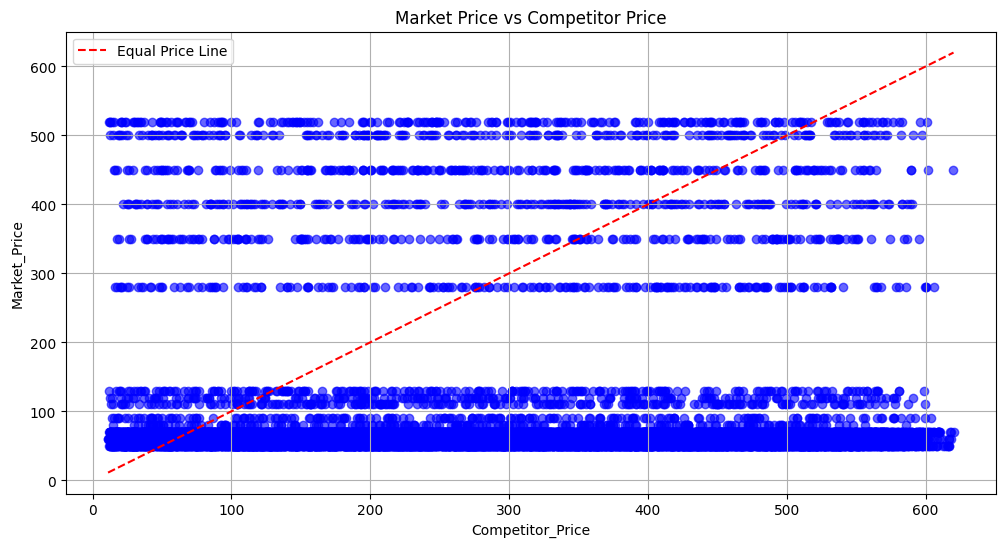

In [24]:

import matplotlib.pyplot as plt



# Strip column names (just in case)
df.columns = df.columns.str.strip()

# Plot comparison
plt.figure(figsize=(12,6))
plt.scatter(df['Market_Price'], df['Competitor_Price'], alpha=0.6, color='blue')
plt.plot([df['Market_Price'].min(), df['Market_Price'].max()], 
         [df['Market_Price'].min(), df['Market_Price'].max()], 
         color='red', linestyle='--', label='Equal Price Line')
plt.xlabel('Competitor_Price')
plt.ylabel('Market_Price')
plt.title('Market Price vs Competitor Price')
plt.legend()
plt.grid(True)
plt.show()


                        Feedback  Rating  Competitor_Rating  \
0                Packaging issue     4.1                3.4   
1                    Low quality     4.6                3.2   
2                Packaging issue     4.2                3.4   
3     Value for money (positive)     4.4                4.0   
4     Value for money (positive)     3.7                3.8   
...                          ...     ...                ...   
9995               Slow delivery     3.8                3.4   
9996             Durable product     4.3                3.8   
9997                 Low quality     3.5                3.1   
9998                 Low quality     4.7                3.4   
9999             Heating problem     4.1                4.6   

     Competitor_Feedback  Market_Price  Competitor_Price  Rating_Diff  \
0           Damaged item        327.24                60          0.7   
1           Damaged item        221.87                50          1.4   
2           Damaged item

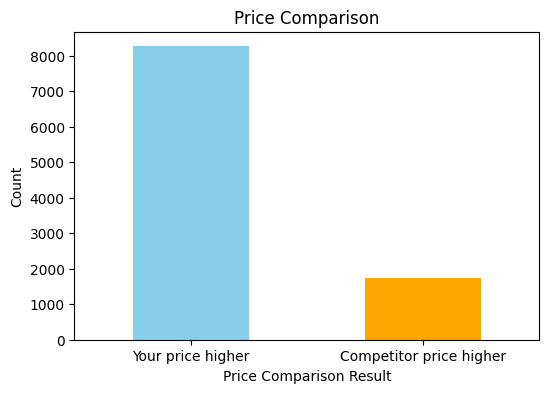

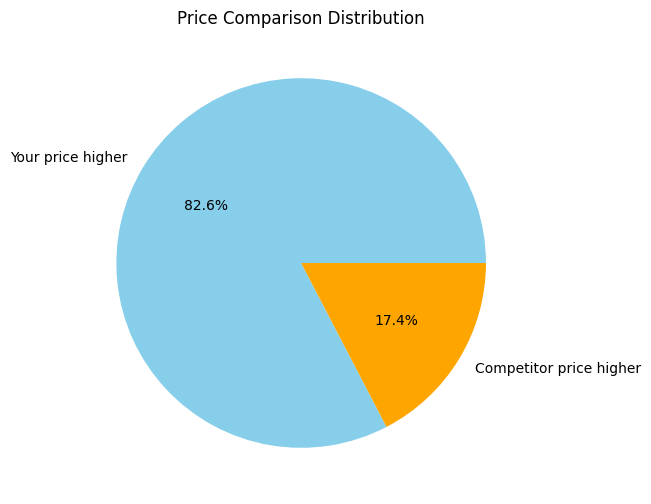

In [44]:

import matplotlib.pyplot as plt

# --- Step 1: Compare Market_Price vs Competitor_Price ---
df["Price_Diff"] = df["Market_Price"] - df["Competitor_Price"]

# --- Step 2: Create Label Column ---
df["Price_Label"] = df["Price_Diff"].apply(
    lambda x: 0 if x > 0 else 1
)

df["Price_Description"] = df["Price_Label"].map({
    0: "Your price higher",
    1: "Competitor price higher"
})

print(df)

# --- Step 3: Visualization ---
counts = df["Price_Description"].value_counts()

# Bar Chart
plt.figure(figsize=(6,4))
counts.plot(kind="bar", color=["skyblue", "orange"])
plt.title("Price Comparison")
plt.xlabel("Price Comparison Result")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Pie Chart
plt.figure(figsize=(6,6))
counts.plot(kind="pie", autopct="%1.1f%%", colors=["skyblue", "orange"])
plt.title("Price Comparison Distribution")
plt.ylabel("")  # remove y-label
plt.show()


In [25]:
df.columns = df.columns.str.strip()

# Keep only ratings for simplicity
ratings_df = df[['Rating', 'Competitor_Rating']]

In [26]:
# Convert ratings to integers if they are float (optional: round to nearest 0.5 or 1)
ratings_df['Rating'] = ratings_df['Rating'].round(0).astype(int)
ratings_df['Competitor_Rating'] = ratings_df['Competitor_Rating'].round(0).astype(int)

# One-hot encoding
rating_ohe = pd.get_dummies(ratings_df['Rating'], prefix='Rating')
competitor_ohe = pd.get_dummies(ratings_df['Competitor_Rating'], prefix='Comp_Rating')

# Combine one-hot columns
ohe_df = pd.concat([rating_ohe, competitor_ohe], axis=1)

C:\Users\Vibhu\AppData\Local\Temp\ipykernel_26808\3191582821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_df['Rating'] = ratings_df['Rating'].round(0).astype(int)
C:\Users\Vibhu\AppData\Local\Temp\ipykernel_26808\3191582821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_df['Competitor_Rating'] = ratings_df['Competitor_Rating'].round(0).astype(int)


In [27]:
# Add difference column (Your Rating - Competitor Rating)
df['Rating_Diff'] = df['Rating'] - df['Competitor_Rating']

# Show summary
comparison_summary = df.groupby('Rating_Diff').size().reset_index(name='Count')
print(comparison_summary)


    Rating_Diff  Count
0          -1.7      1
1          -1.6      3
2          -1.6      2
3          -1.5      2
4          -1.5      1
..          ...    ...
85          1.6      6
86          1.6      7
87          1.7      6
88          1.7      2
89          1.8      2

[90 rows x 2 columns]


In [28]:
# Add difference column (Your Rating - Competitor Rating)
df['Rating_Diff'] = df['Rating'] - df['Competitor_Rating']

# Show summary
comparison_summary = df.groupby('Rating_Diff').size().reset_index(name='Count')
print(comparison_summary)


    Rating_Diff  Count
0          -1.7      1
1          -1.6      3
2          -1.6      2
3          -1.5      2
4          -1.5      1
..          ...    ...
85          1.6      6
86          1.6      7
87          1.7      6
88          1.7      2
89          1.8      2

[90 rows x 2 columns]


In [29]:
# Add difference column (Your Rating - Competitor Rating)
df['Rating_Diff'] = df['Rating'] - df['Competitor_Rating']

# Show summary
comparison_summary = df.groupby('Rating_Diff').size().reset_index(name='Count')
print(comparison_summary)


    Rating_Diff  Count
0          -1.7      1
1          -1.6      3
2          -1.6      2
3          -1.5      2
4          -1.5      1
..          ...    ...
85          1.6      6
86          1.6      7
87          1.7      6
88          1.7      2
89          1.8      2

[90 rows x 2 columns]


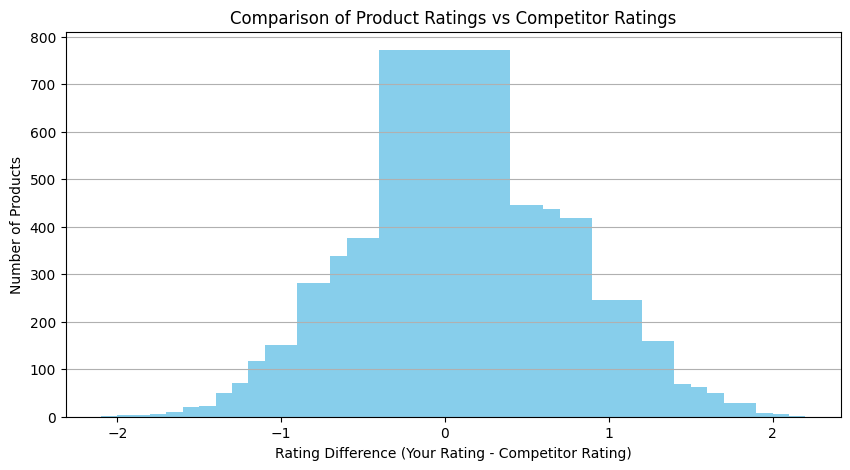

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(comparison_summary['Rating_Diff'], comparison_summary['Count'], color='skyblue')
plt.xlabel('Rating Difference (Your Rating - Competitor Rating)')
plt.ylabel('Number of Products')
plt.title('Comparison of Product Ratings vs Competitor Ratings')
plt.grid(axis='y')
plt.show()


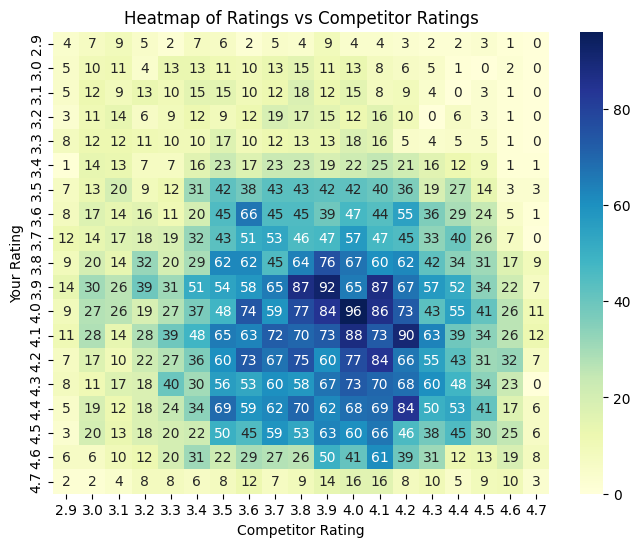

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap of one-hot rating comparison
heatmap_df = pd.crosstab(df['Rating'], df['Competitor_Rating'])

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_df, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Competitor Rating")
plt.ylabel("Your Rating")
plt.title("Heatmap of Ratings vs Competitor Ratings")
plt.show()


In [32]:

from transformers import pipeline



# Load smaller sentiment model (faster than DistilBERT)
sentiment_model = pipeline("sentiment-analysis", 
                           model="distilbert-base-uncased-finetuned-sst-2-english",
                           device=0)  # use GPU if available

# Convert to list
feedbacks = df["Feedback"].astype(str).tolist()
competitor_feedbacks = df["Competitor_Feedback"].astype(str).tolist()

# Run in batches instead of one by one
batch_size = 32

def batch_predict(texts):
    results = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        results.extend(sentiment_model(batch))
    return results

results_feedback = batch_predict(feedbacks)
results_competitor = batch_predict(competitor_feedbacks)

# Save results
df["Feedback_Sentiment"] = [r["label"] for r in results_feedback]
df["Feedback_Score"] = [r["score"] for r in results_feedback]
df["Competitor_Sentiment"] = [r["label"] for r in results_competitor]
df["Competitor_Score"] = [r["score"] for r in results_competitor]

df.to_csv("sentiment_results.csv", index=False)
print("✅ Done! Saved as sentiment_results.csv")


Device set to use cpu


✅ Done! Saved as sentiment_results.csv


In [33]:
import pandas as pd

# Load the saved CSV
df = pd.read_csv("sentiment_results.csv")

# Show first 10 rows
df.head(10)


,Feedback,Rating,Competitor_Rating,Competitor_Feedback,Market_Price,Competitor_Price,Rating_Diff,Feedback_Sentiment,Feedback_Score,Competitor_Sentiment,Competitor_Score
0,Packaging issue,4.1,3.4,Damaged item,327.24,60,0.7,NEGATIVE,0.991019,NEGATIVE,0.999619
1,Low quality,4.6,3.2,Damaged item,221.87,50,1.4,NEGATIVE,0.999771,NEGATIVE,0.999619
2,Packaging issue,4.2,3.4,Damaged item,226.07,50,0.8,NEGATIVE,0.991019,NEGATIVE,0.999619
3,Value for money (positive),4.4,4.0,Durable product,236.15,50,0.4,POSITIVE,0.999813,POSITIVE,0.999830
4,Value for money (positive),3.7,3.8,Satisfied customer,124.68,70,-0.1,POSITIVE,0.999813,POSITIVE,0.999751
5,Durable product,4.4,4.5,Battery drains fast,104.20,70,-0.1,POSITIVE,0.999830,NEGATIVE,0.729715
6,Heating problem,3.4,3.5,Battery drains fast,215.56,60,-0.1,NEGATIVE,0.996171,NEGATIVE,0.729715
7,Satisfied customer,4.4,4.4,Heating problem,351.59,60,0.0,POSITIVE,0.999751,NEGATIVE,0.996171
8,Slow delivery,4.3,3.8,Low quality,168.33,350,0.5,NEGATIVE,0.999711,NEGATIVE,0.999771
9,Slow delivery,3.3,4.3,Slow delivery,20.67,50,-1.0,NEGATIVE,0.999711,NEGATIVE,0.999711


In [38]:

import plotly.express as px

df = pd.read_csv("sentiment_results.csv")

# Distribution of feedback vs competitor
fig = px.histogram(df, x="Feedback_Sentiment", title="Your Product Sentiment Distribution")
fig.show()

fig2 = px.histogram(df, x="Competitor_Sentiment", title="Competitor Sentiment Distribution")
fig2.show()


In [ ]:
#------------------------RoBERTa sentiment model------------------------------------

In [41]:
from transformers import pipeline
import pandas as pd

# ✅ Load RoBERTa sentiment model (better accuracy than DistilBERT)
sentiment_model = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment",
    tokenizer="cardiffnlp/twitter-roberta-base-sentiment",
    device=0  # use GPU if available, set -1 for CPU
)

# Convert to list
feedbacks = df["Feedback"].astype(str).tolist()
competitor_feedbacks = df["Competitor_Feedback"].astype(str).tolist()

# Run in batches (faster than row by row)
batch_size = 32

def batch_predict(texts):
    results = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        results.extend(sentiment_model(batch))
    return results

# Run analysis
results_feedback = batch_predict(feedbacks)
results_competitor = batch_predict(competitor_feedbacks)

# Map labels: RoBERTa gives LABEL_0, LABEL_1, LABEL_2
# We keep only Positive/Negative, Neutral → Negative (or you can drop)
def map_labels(label):
    if label == "LABEL_2":
        return "Positive"
    else:
        return "Negative"

# Save results in DataFrame
df["Feedback_Sentiment"] = [map_labels(r["label"]) for r in results_feedback]
df["Feedback_Score"] = [r["score"] for r in results_feedback]
df["Competitor_Sentiment"] = [map_labels(r["label"]) for r in results_competitor]
df["Competitor_Score"] = [r["score"] for r in results_competitor]

# Save to CSV
df.to_csv("sentiment_results_roberta.csv", index=False)
print("✅ Done! Saved as sentiment_results_roberta.csv")

# Quick check (first 5 rows)
print(df[["Feedback", "Feedback_Sentiment", "Competitor_Feedback", "Competitor_Sentiment"]].head())


Device set to use cpu


✅ Done! Saved as sentiment_results_roberta.csv
                     Feedback Feedback_Sentiment Competitor_Feedback  \
0             Packaging issue           Negative        Damaged item   
1                 Low quality           Negative        Damaged item   
2             Packaging issue           Negative        Damaged item   
3  Value for money (positive)           Positive     Durable product   
4  Value for money (positive)           Positive  Satisfied customer   

  Competitor_Sentiment  
0             Negative  
1             Negative  
2             Negative  
3             Negative  
4             Positive  


In [42]:
import pandas as pd

# Load the saved CSV
df = pd.read_csv("sentiment_results_roberta.csv")

# Show first 10 rows
df.head(10)


,Feedback,Rating,Competitor_Rating,Competitor_Feedback,Market_Price,Competitor_Price,Rating_Diff,Feedback_Sentiment,Feedback_Score,Competitor_Sentiment,Competitor_Score
0,Packaging issue,4.1,3.4,Damaged item,327.24,60,0.7,Negative,0.499219,Negative,0.598777
1,Low quality,4.6,3.2,Damaged item,221.87,50,1.4,Negative,0.736215,Negative,0.598777
2,Packaging issue,4.2,3.4,Damaged item,226.07,50,0.8,Negative,0.499219,Negative,0.598777
3,Value for money (positive),4.4,4.0,Durable product,236.15,50,0.4,Positive,0.612780,Negative,0.601724
4,Value for money (positive),3.7,3.8,Satisfied customer,124.68,70,-0.1,Positive,0.612780,Positive,0.889923
5,Durable product,4.4,4.5,Battery drains fast,104.20,70,-0.1,Negative,0.601724,Negative,0.778928
6,Heating problem,3.4,3.5,Battery drains fast,215.56,60,-0.1,Negative,0.584184,Negative,0.778928
7,Satisfied customer,4.4,4.4,Heating problem,351.59,60,0.0,Positive,0.889923,Negative,0.584184
8,Slow delivery,4.3,3.8,Low quality,168.33,350,0.5,Negative,0.761079,Negative,0.736215
9,Slow delivery,3.3,4.3,Slow delivery,20.67,50,-1.0,Negative,0.761079,Negative,0.761079


In [43]:

import plotly.express as px

df = pd.read_csv("sentiment_results_roberta.csv")

# Distribution of feedback vs competitor
fig = px.histogram(df, x="Feedback_Sentiment", title="Your Product Sentiment Distribution")
fig.show()

fig2 = px.histogram(df, x="Competitor_Sentiment", title="Competitor Sentiment Distribution")
fig2.show()
